In [ ]:
import numpy as np 
import pandas as pd
import random as rd
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.metrics import accuracy
from keras.applications.vgg16 import VGG16
#setting seed for reproducability
from numpy.random import seed
seed(25)
tf.random.set_seed(50)

In [ ]:
# 0 - Normal
# 1 - Tumor

data = [] #creating a list for images
paths = [] #creating a list for paths
labels = [] #creating a list to put our 0 or 1 labels

#staring with the images that have tumors
for r, d, f in os.walk(r'C:\Users\rokzc\Documents\agumented\yes_agumented'):
    for file in f:
        if '.jpeg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        labels.append(1)

#now working with the images with no tumors        
paths = []
for r, d, f in os.walk(r"C:\Users\rokzc\Documents\agumented\No_agumented"):
    for file in f:
        if '.jpeg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        labels.append(0)
        
data = np.array(data)
data.shape

labels = np.array(labels)
labels = labels.reshape(2444,1)

print('data shape is:', data.shape)
print('labels shape is:', labels.shape)

data shape is: (2444, 128, 128, 3)
labels shape is: (2444, 1)


In [ ]:
print(data.shape)


(2444, 128, 128, 3)


In [ ]:
print(np.max(data))
#getting the min of the array
print(np.min(data))

255
0


In [ ]:
#reducing the data to between 1 and 0
data = data / 255.00
#getting the max of the array
print(np.max(data))
#getting the min of the array
print(np.min(data))


1.0
0.0


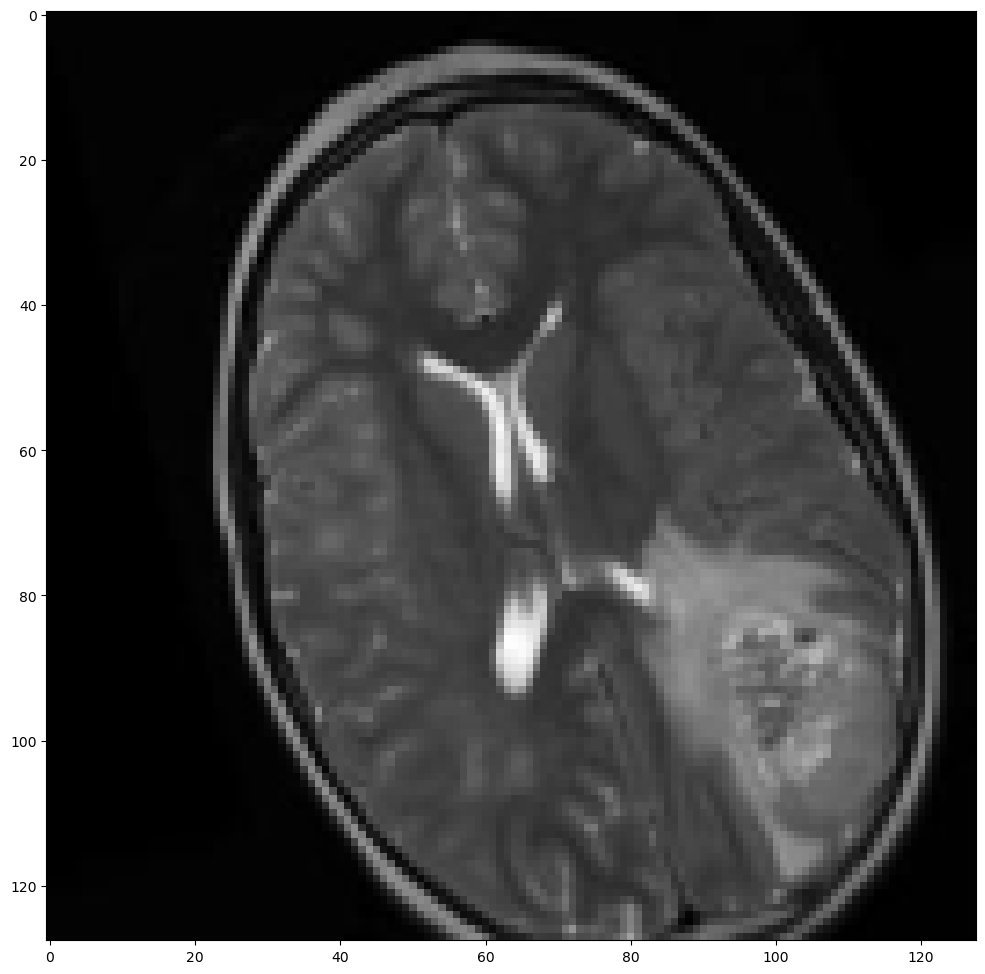

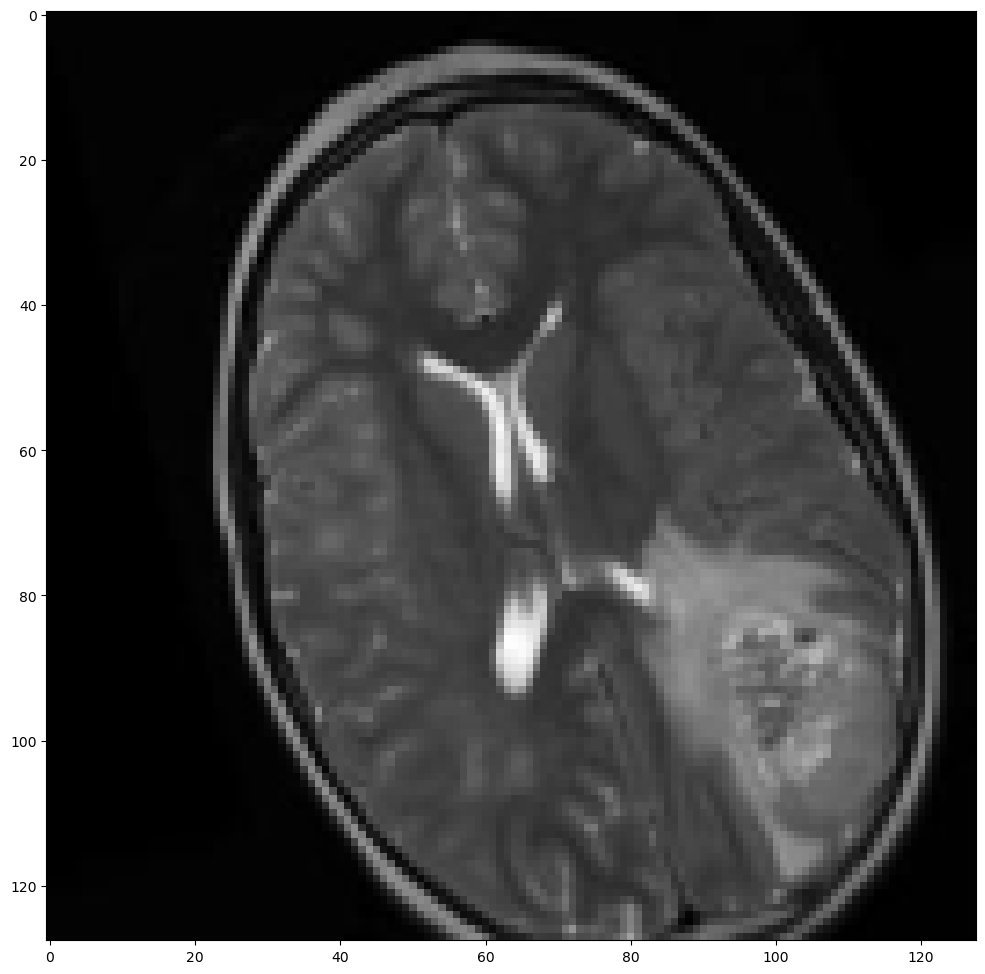

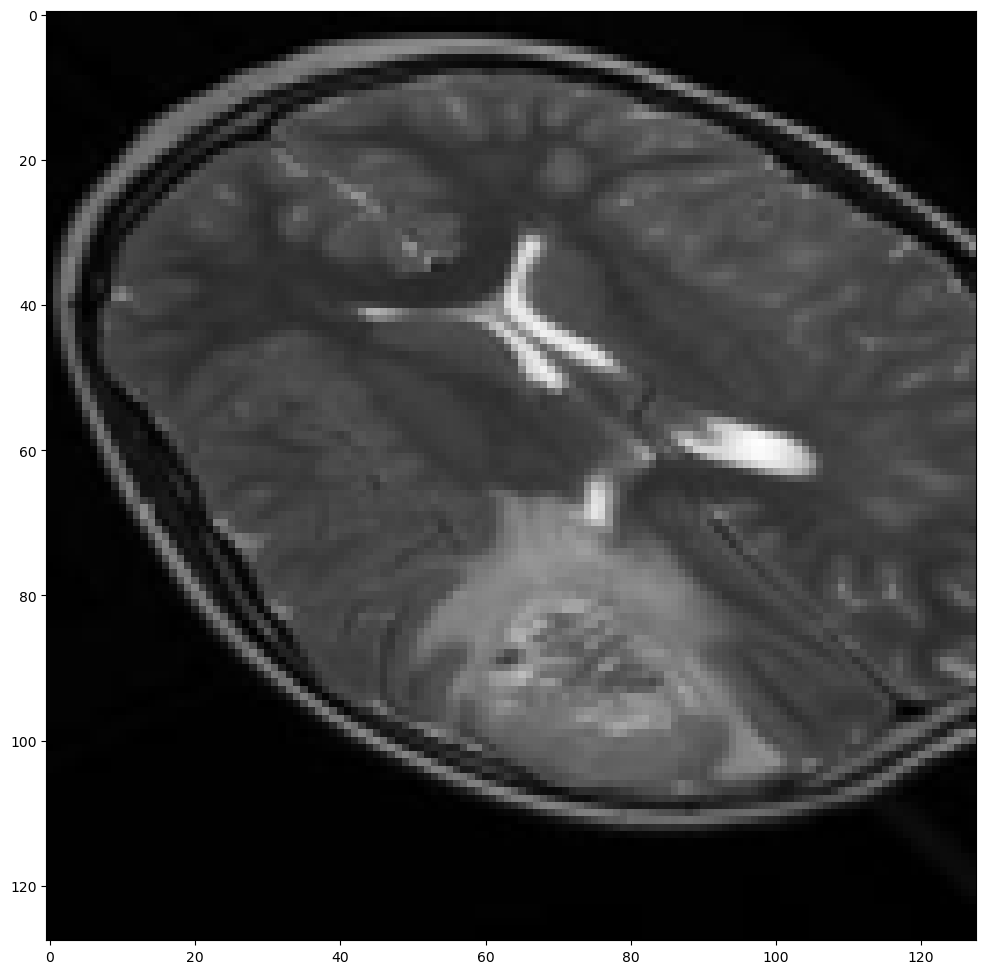

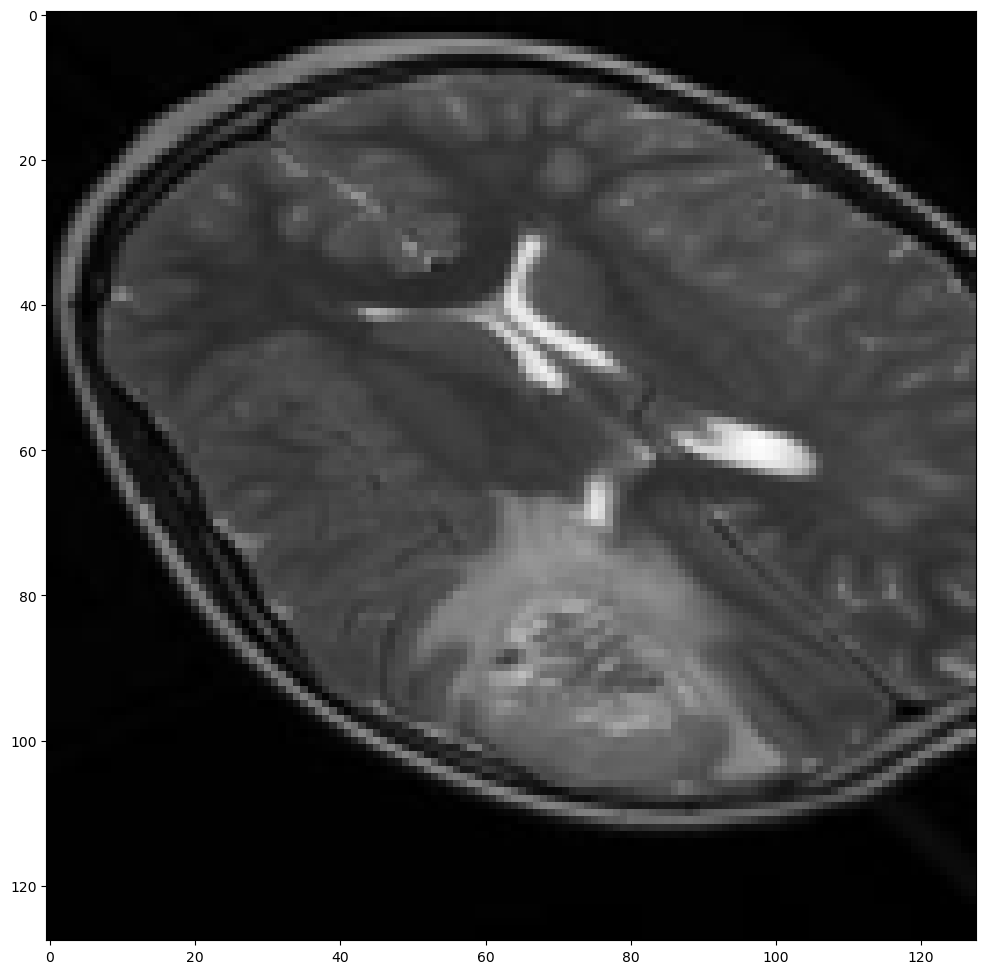

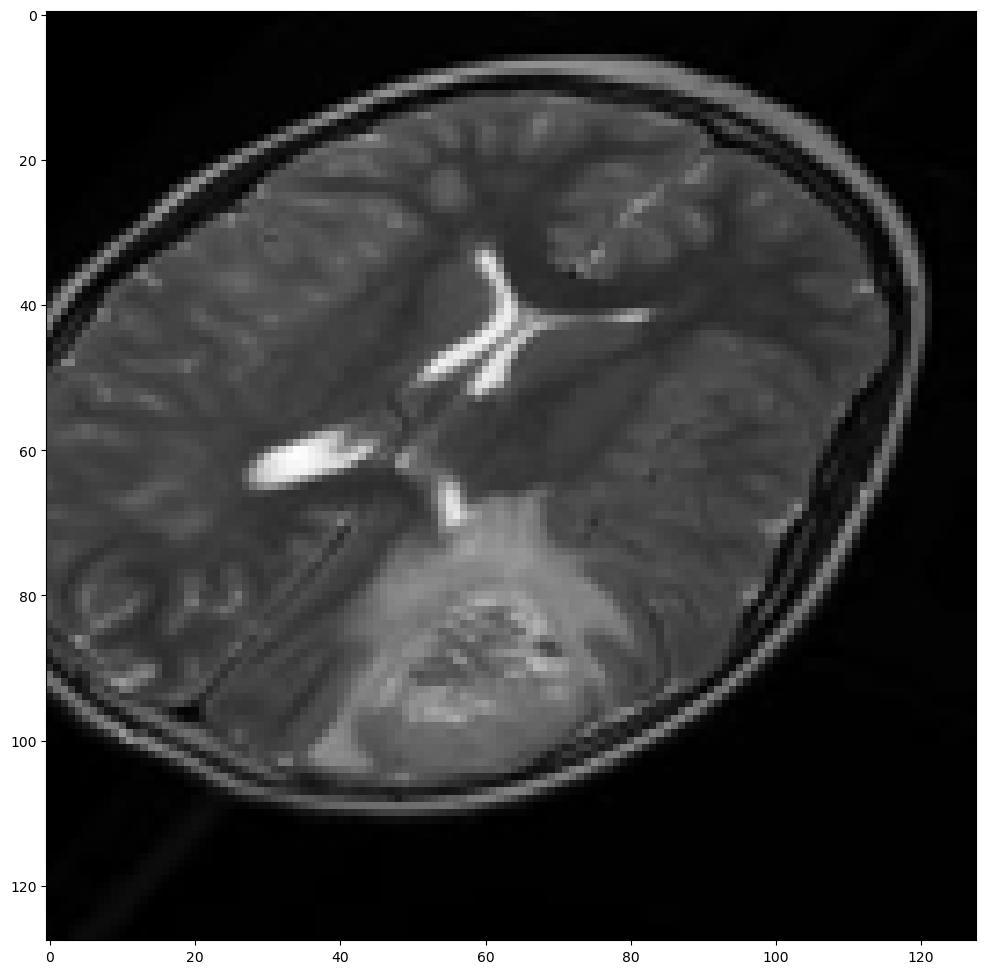

In [ ]:
for i in range(5):
    fig = plt.figure(figsize=(70,70))
    plt.subplot(5,5,i+1)
    image = plt.imshow(data[i])
    plt.show(image)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data, labels, test_size=0.3, shuffle=True, random_state=7)

In [ ]:
print("shape of our training data:",x_train.shape)
print("shape of our training labels:",y_train.shape)
print("shape of our test data:",x_test.shape)
print("shape of our test labels:",y_test.shape)

shape of our training data: (1710, 128, 128, 3)
shape of our training labels: (1710, 1)
shape of our test data: (734, 128, 128, 3)
shape of our test labels: (734, 1)


In [ ]:
model = keras.Sequential([
    
    layers.Conv2D(filters=32, kernel_size=(5,5), activation="relu", padding='same', input_shape=[128, 128, 3]),
    layers.MaxPool2D(),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    
    layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    
    layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    
    layers.Flatten(),
    layers.Dropout(.25),
    layers.Dense(units=256, activation="relu"),
    layers.Dense(units=1, activation="sigmoid"),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)      0

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

#including early stopping to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

In [ ]:
history = model.fit(
    x = x_train,
    y = y_train,
    validation_data= (x_test,y_test),
    batch_size = 64,
    epochs=250,
    callbacks=[early_stopping],
    verbose=(2),
)

Epoch 1/250
27/27 - 68s - loss: 0.5857 - accuracy: 0.7310 - val_loss: 0.5627 - val_accuracy: 0.7398 - 68s/epoch - 3s/step
Epoch 2/250
27/27 - 64s - loss: 0.5132 - accuracy: 0.7678 - val_loss: 0.5380 - val_accuracy: 0.7398 - 64s/epoch - 2s/step
Epoch 3/250
27/27 - 68s - loss: 0.4971 - accuracy: 0.7678 - val_loss: 0.5141 - val_accuracy: 0.7439 - 68s/epoch - 3s/step
Epoch 4/250
27/27 - 66s - loss: 0.4836 - accuracy: 0.7749 - val_loss: 0.5009 - val_accuracy: 0.7602 - 66s/epoch - 2s/step
Epoch 5/250
27/27 - 67s - loss: 0.4723 - accuracy: 0.7901 - val_loss: 0.4915 - val_accuracy: 0.7698 - 67s/epoch - 2s/step
Epoch 6/250
27/27 - 64s - loss: 0.4684 - accuracy: 0.7865 - val_loss: 0.4863 - val_accuracy: 0.7834 - 64s/epoch - 2s/step
Epoch 7/250
27/27 - 63s - loss: 0.4705 - accuracy: 0.7871 - val_loss: 0.5070 - val_accuracy: 0.7589 - 63s/epoch - 2s/step
Epoch 8/250
27/27 - 65s - loss: 0.4748 - accuracy: 0.7842 - val_loss: 0.4793 - val_accuracy: 0.7847 - 65s/epoch - 2s/step
Epoch 9/250
27/27 - 66s 

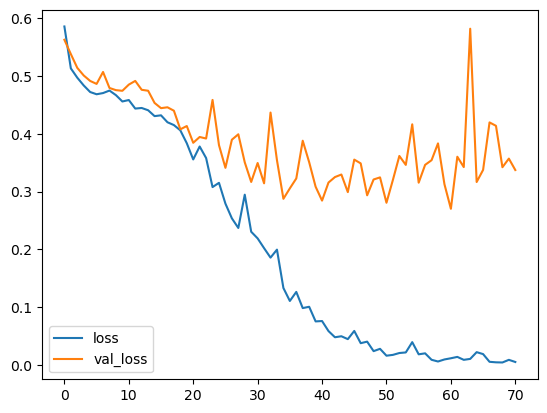

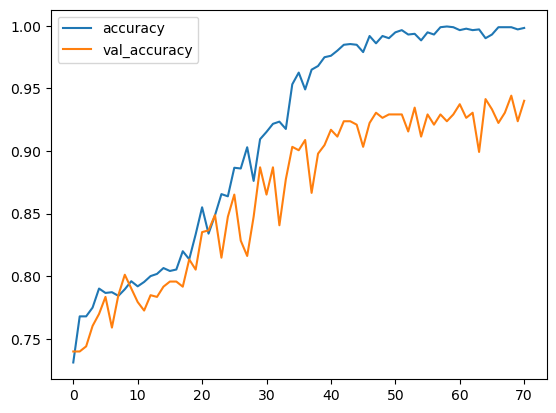

In [ ]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss','val_loss']].plot()
history_frame.loc[:, ['accuracy','val_accuracy']].plot();

In [ ]:
pred = model.predict(x_test)

for i in range(len(pred)):
    if pred[i] > 0.5:
        pred[i] = 1
    else:
        pred[i] = 0
     
pred = pred.astype(int)

23/23 [==============================] - 3s 107ms/step


In [ ]:
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       0.89      0.87      0.88       191\n           1       0.95      0.96      0.96       543\n\n    accuracy                           0.94       734\n   macro avg       0.92      0.92      0.92       734\nweighted avg       0.94      0.94      0.94       734\n'

In [ ]:
model.save('vgg16.h5')

In [ ]:
new_model=tf.keras.models.load_model('vgg16.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)      0

In [ ]:
pred_new = new_model.predict(x_test)

for i in range(len(pred)):
    if pred_new[i] > 0.5:
        pred_new[i] = 1
    else:
        pred_new[i] = 0
     
pred_new = pred_new.astype(int)

23/23 [==============================] - 7s 318ms/step


In [ ]:
classification_report(y_test, pred_new)

'              precision    recall  f1-score   support\n\n           0       0.89      0.87      0.88       191\n           1       0.95      0.96      0.96       543\n\n    accuracy                           0.94       734\n   macro avg       0.92      0.92      0.92       734\nweighted avg       0.94      0.94      0.94       734\n'

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# pred_new=np.argmax(pred_new,axis=1)
abc=confusion_matrix(y_test,pred_new)

Text(50.722222222222214, 0.5, 'true')

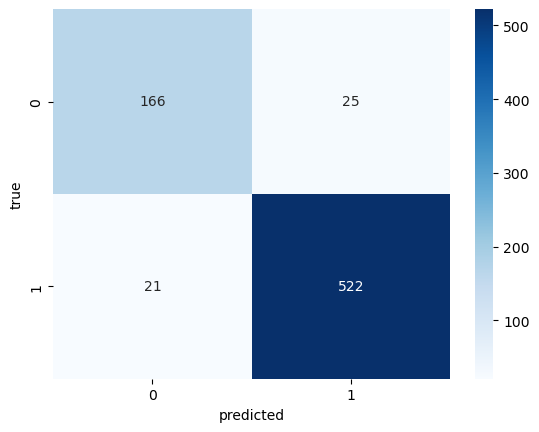

In [ ]:
sns.heatmap(abc,annot=True,fmt='d',cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('true')